<a href="https://colab.research.google.com/github/sahil9022-crypto/Netflix-Movies-EDA/blob/main/NetflixmoviesEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Step 1: Upload your kaggle.json API key (from your Kaggle account settings)
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahilpawar25","key":"f12b17b730dd2adaa66d4bb3629d9612"}'}

In [10]:
# Step 2: Move it to ~/.kaggle and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [11]:
# Step 3: Download Netflix dataset from Kaggle
!kaggle datasets download -d shivamb/netflix-shows


Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 400MB/s]


In [12]:
# Step 4: Unzip the dataset
!unzip netflix-shows.zip


Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('netflix_titles.csv')

# Display top 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
# Shape and column info
print(df.shape)
df.info()

# Check missing values
df.isnull().sum()


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [18]:
# Drop unnecessary columns if needed (optional)
# df = df.drop(['show_id', 'description'], axis=1)

# Drop rows with too many missing values
df.dropna(subset=['director', 'cast', 'country'], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create a new column for Year
df['year_added'] = df['date_added'].dt.year

/tmp/ipython-input-19-1212866089.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


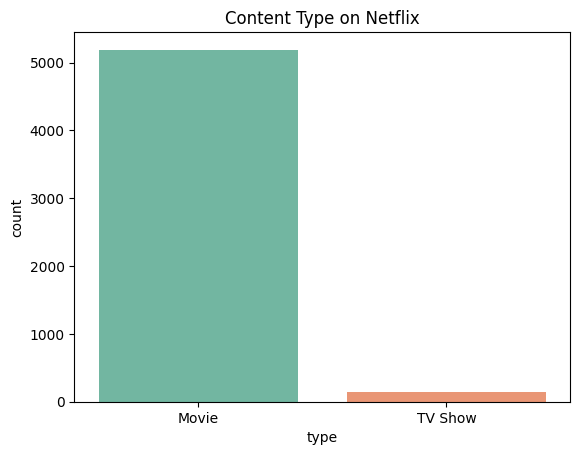

In [19]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Content Type on Netflix")
plt.show()


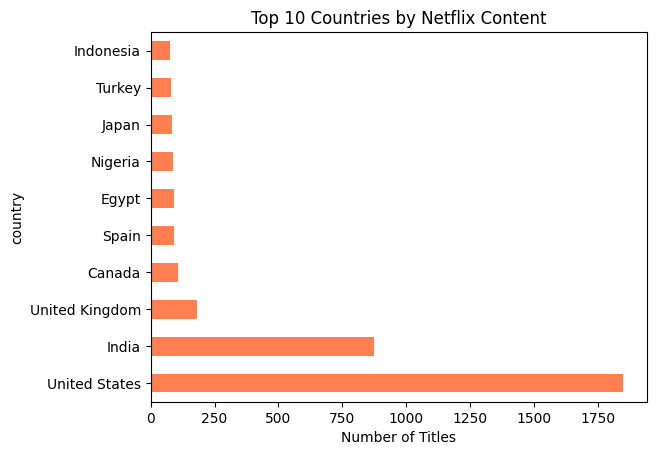

In [20]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='coral')
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Number of Titles")
plt.show()


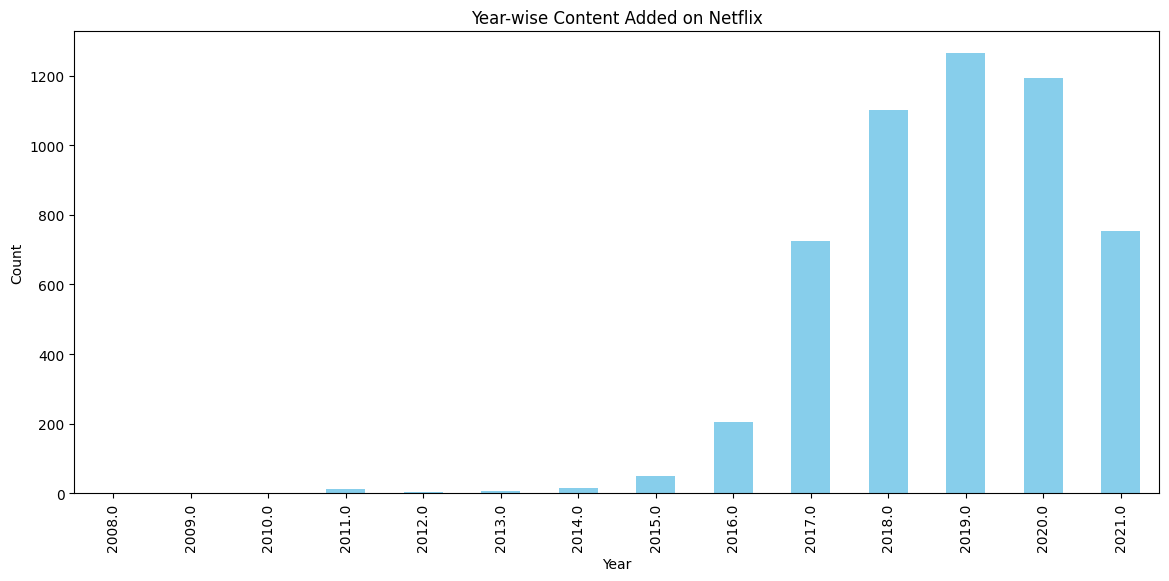

In [21]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(14,6), color='skyblue')
plt.title("Year-wise Content Added on Netflix")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


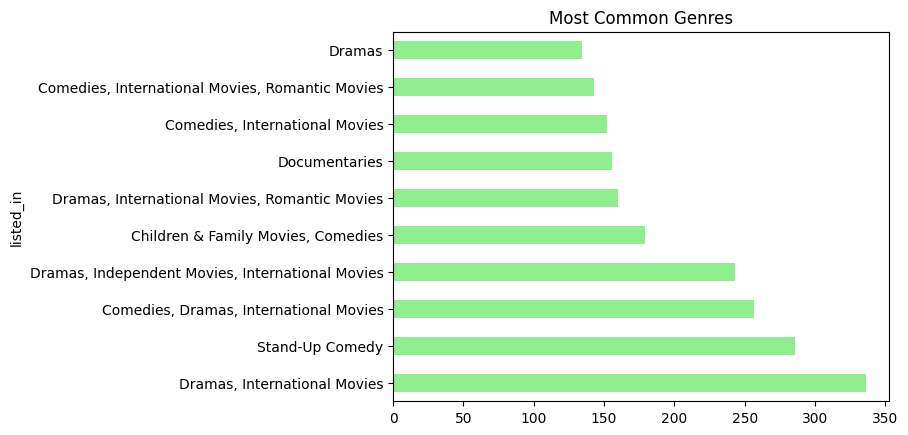

In [22]:
df['listed_in'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Most Common Genres")
plt.show()


# 🎬 Netflix Movies EDA (Exploratory Data Analysis)

This beginner-friendly data science project performs Exploratory Data Analysis (EDA) on the Netflix Movies and TV Shows dataset. The goal is to extract key insights about content types, release trends, genres, and countries.

---

## 📌 Project Goals

- Analyze the types of content available on Netflix.
- Visualize trends in content release year-wise.
- Explore genres and country-wise distribution.
- Practice data cleaning and visualization skills.

---

## 📁 Dataset

- **Source**: [Kaggle - Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)
- **Rows**: 8,000+ records
- **Columns**: Title, Director, Cast, Country, Type, Release Year, Date Added, and more

---

## 🧰 Tools & Libraries Used

- **Python**
- **Google Colab**
- `pandas`
- `matplotlib`
- `seaborn`

---

## 📊 Key Visualizations

- 📈 Year-wise content addition
- 🌍 Top 10 countries contributing to Netflix content
- 🎭 Most common genres on the platform
- 🎬 Distribution of movies vs TV shows

---

## 🧹 Data Cleaning Steps

- Converted `date_added` to datetime format
- Created new column `year_added` for trend analysis
- Handled missing values in critical columns like `director`, `cast`, `country`

---

## 📎 How to Run

1. Clone this repository or download the `.ipynb` file
2. Open the file in [Google Colab](https://colab.research.google.com/)
3. Upload your `kaggle.json` to download the dataset using Kaggle API
4. Run the notebook cell by cell

---

## 📷 Sample Output

*(You can add screenshots of your visualizations here)*

---

## 🤝 Contributing

Pull requests are welcome. For major changes, please open an issue first to discuss what you'd like to change.

---

## 📧 Contact

Created with ❤️ by **Sahil Pawar**  
For queries, reach out at: [publichacker9999@gmail.com]

---
